C:\Users\mridu\AppData\Local\Temp\ipykernel_9548\468485381.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(f1, header=None, delim_whitespace=True)
C:\Users\mridu\AppData\Local\Temp\ipykernel_9548\468485381.py:79: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv(f2, header=None, delim_whitespace=True)
C:\Users\mridu\AppData\Local\Temp\ipykernel_9548\468485381.py:84: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df3 = pd.read_csv(f3, header=None, delim_whitespace=True)


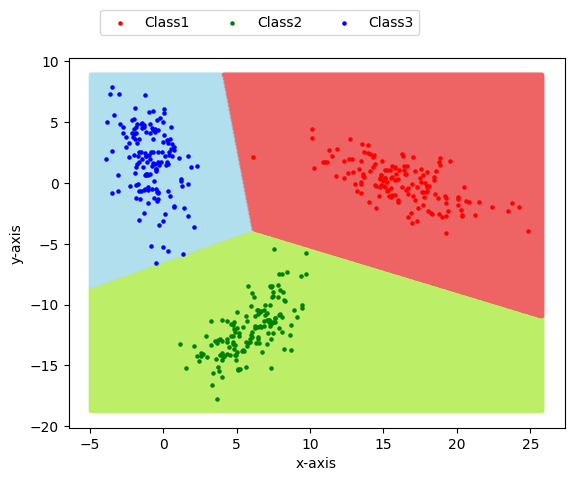

AttributeError: 'Perceptron' object has no attribute 'loss_curve_'

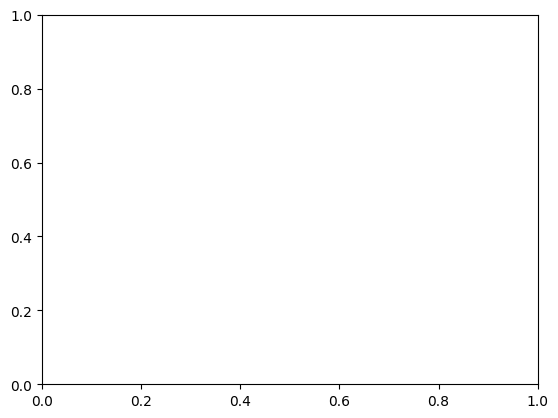

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

### Function to combine data for three classes (train, validate, test)
def three_class_data(train1, train2, train3, test1, test2, test3):
    trainX = np.concatenate((train1, train2, train3), axis=0).astype(float)
    trainY = np.array([0 for _ in range(len(train1))] + [1 for _ in range(len(train2))] + [2 for _ in range(len(train3))])
    testX = np.concatenate((test1, test2, test3), axis=0).astype(float)
    testY = np.array([0 for _ in range(len(test1))] + [1 for _ in range(len(test2))] + [2 for _ in range(len(test3))])
    return trainX, trainY, testX, testY

### Get the final prediction in case of more than two classes
def predictAllClass(testX, model):
    final_pred = []
    for i in range(len(testX)):
        x = testX[i:i+1]
        pred = model.predict(x)
        final_pred.append(int(pred[0]))  # Convert prediction to integer label (0, 1, or 2)
    return final_pred

### Function for decision boundary plot
def decision_boundary_plot(model, testX, test1, test2, test3):
    x_min, x_max = testX[:, 0].min() - 1, testX[:, 0].max() + 1
    y_min, y_max = testX[:, 1].min() - 1, testX[:, 1].max() + 1
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    g_data = np.c_[xx.ravel(), yy.ravel()]
    
    predictedLabel = predictAllClass(g_data, model)
    color = ['#EE6363', '#BCEE68', '#B2DFEE']  # Colors for 3 classes (Class 0, 1, and 2)
    predictedColor = [color[i] for i in predictedLabel]
    
    plt.scatter(g_data[:, 0], g_data[:, 1], s=5, color=predictedColor)
    plt.scatter(test1[:, 0], test1[:, 1], s=5, color='red', label='Class1')
    plt.scatter(test2[:, 0], test2[:, 1], s=5, color='green', label='Class2')
    plt.scatter(test3[:, 0], test3[:, 1], s=5, color='blue', label='Class3')
    plt.legend(bbox_to_anchor=(0.05, 1.15), loc='upper left', ncol=3)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.savefig("decision_boundary_Perceptron.png", dpi=300, bbox_inches="tight")
    plt.show()

### To plot error for each epoch
def epochVsError_plot(model, classes):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    error = model.loss_curve_
    nepoch = [i + 1 for i in range(len(error))]
    plt.scatter(nepoch, error, marker='o', s=5, facecolors='b', edgecolors='b')
    plt.xlabel('Number of Epoch')
    plt.ylabel('Average Error')
    plt.savefig("AvgErrorVsEpoch{}{}_Perceptron.png".format(classes[0], classes[1]), dpi=300, bbox_inches="tight")
    plt.show()

### To calculate the confusion matrix and classification accuracy
def confusion_matrix(actual, predicted):
    n_label = len(np.unique(actual))
    cm = np.zeros((n_label, n_label))
    for i, j in zip(actual, predicted):
        cm[i][j] += 1
    accuracy = np.sum(actual == predicted) * 100.0 / float(len(actual))
    return cm, accuracy

#### Main script for the three-class classification

# Paths to the class datasets
f1 = r"../Datasets/LinearDataset/Class1.txt"
f2 = r"../Datasets/LinearDataset/Class2.txt"
f3 = r"../Datasets/LinearDataset/Class3.txt"

### Divide the Class1 data into training and testing data
df1 = pd.read_csv(f1, header=None, delim_whitespace=True)
train1 = df1.sample(frac=0.70, random_state=100)
test1 = df1[~df1.index.isin(train1.index)]

### Divide the Class2 data into training and testing data
df2 = pd.read_csv(f2, header=None, delim_whitespace=True)
train2 = df2.sample(frac=0.70, random_state=100)
test2 = df2[~df2.index.isin(train2.index)]

### Divide the Class3 data into training and testing data
df3 = pd.read_csv(f3, header=None, delim_whitespace=True)
train3 = df3.sample(frac=0.70, random_state=100)
test3 = df3[~df3.index.isin(train3.index)]

#### Combine data from all three classes
trainX, trainY, testX, testY = three_class_data(train1.values, train2.values, train3.values, test1.values, test2.values, test3.values)

### Parameter Setup
lr, n_ep, th, ep_status, task = 0.001, 5000, 0.001, True, 'classification'

### Classification between Class1, Class2, and Class3
model = Perceptron(alpha=lr, max_iter=n_ep, tol=th)
model.fit(trainX, trainY)

### Call the predictAllClass function to get the prediction label
final_pred = predictAllClass(testX, model)

### Call the 'decision_boundary_plot' function to plot the decision boundary
decision_boundary_plot(model, testX, test1.values, test2.values, test3.values)

### Call the 'epochVsError_plot' function for all three classes
epochVsError_plot(model, [1, 2, 3])

### Call the confusion_matrix function
CM, Accuracy = confusion_matrix(testY, final_pred)

print("Confusion Matrix: {}\n".format(CM))
print("Classification Accuracy: {}\n".format(Accuracy))
